# Microbiome clustering by country

## CAN I PREDICT A PERSON'S ORIGIN BASED ON ITS MICROBIOME???

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

## bringing in datasets (default datasets)
from sklearn import datasets
## metrics for scoring KNN
import sklearn.metrics as sm
from sklearn.cluster import KMeans

## KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score

# RANDOM FOREST
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

## Read in the data




In [246]:
df= pd.read_csv('cluster_me.csv')

## Check the data types


In [247]:
df.head()

,subjectID,age,gender,country,Methanobrevibacter_smithii,Methanobrevibacter_unclassified,Methanosphaera_stadtmanae,Rothia_mucilaginosa,Bifidobacterium_adolescentis,Bifidobacterium_angulatum,...,Pseudomonas_syringae,Parabacteroides_sp_20_3,Lactobacillus_amylovorus,Lactobacillus_johnsonii,Saccharopolyspora_unclassified,Cetobacterium_somerae,Lysinibacillus_unclassified,Lactobacillus_antri,Lysinibacillus_sphaericus,Megasphaera_sp_BV3C16_1
0,158256496,NaN,female,usa,0.00000,0.00000,0.0,0.00000,0.07102,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,158337416,NaN,female,usa,0.00000,0.00000,0.0,0.01294,0.15321,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,158357646,NaN,male,usa,0.01624,0.01724,0.0,0.02041,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,158458797,NaN,female,usa,0.00000,0.00000,0.0,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,158479027,NaN,male,usa,0.00000,0.00000,0.0,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [248]:
df.dtypes

subjectID                       object
age                            float64
gender                          object
country                         object
Methanobrevibacter_smithii     float64
                                ...   
Cetobacterium_somerae          float64
Lysinibacillus_unclassified    float64
Lactobacillus_antri            float64
Lysinibacillus_sphaericus      float64
Megasphaera_sp_BV3C16_1        float64
Length: 226, dtype: object

## Check the count/mean/std/min/IQRs


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Columns: 226 entries, subjectID to Megasphaera_sp_BV3C16_1
dtypes: float64(223), object(3)
memory usage: 1.3+ MB


In [250]:
df.describe()

,age,Methanobrevibacter_smithii,Methanobrevibacter_unclassified,Methanosphaera_stadtmanae,Rothia_mucilaginosa,Bifidobacterium_adolescentis,Bifidobacterium_angulatum,Bifidobacterium_bifidum,Bifidobacterium_catenulatum,Bifidobacterium_longum,...,Pseudomonas_syringae,Parabacteroides_sp_20_3,Lactobacillus_amylovorus,Lactobacillus_johnsonii,Saccharopolyspora_unclassified,Cetobacterium_somerae,Lysinibacillus_unclassified,Lactobacillus_antri,Lysinibacillus_sphaericus,Megasphaera_sp_BV3C16_1
count,639.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,...,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,45.670736,0.668162,0.018618,0.016615,0.010814,0.544535,0.011614,0.151929,0.047813,0.549049,...,0.024718,0.015592,0.008774,0.005268,0.003567,0.016346,0.002212,0.007358,0.000986,0.001193
std,16.567511,3.091787,0.156535,0.161971,0.158903,1.981976,0.155191,0.850764,0.490637,2.401254,...,0.688113,0.308388,0.237768,0.131941,0.052088,0.440382,0.061587,0.204732,0.027445,0.033204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031960,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,0.089595,0.000000,0.000000,0.000375,0.179755,0.000000,0.000000,0.000000,0.291105,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,41.215020,2.661680,3.767280,4.385170,30.057840,3.515930,11.586860,11.749710,54.735830,...,19.156250,6.669290,6.617930,3.666090,1.012080,12.257060,1.714500,5.699490,0.764040,0.924370


## Check the nulls


In [251]:
## no nulls in the df
print(df.isnull().sum())

subjectID                        0
age                            136
gender                          20
country                          0
Methanobrevibacter_smithii       0
                              ... 
Cetobacterium_somerae            0
Lysinibacillus_unclassified      0
Lactobacillus_antri              0
Lysinibacillus_sphaericus        0
Megasphaera_sp_BV3C16_1          0
Length: 226, dtype: int64


## FEATURE ENGINEERING

### 1. Drop columns I do not need

In [252]:
df=df.drop(['age','gender','subjectID'], axis=1)

### 3. Convert country to numeric

In [253]:
dict_country={'china':1, 'denmark':2, 'usa':3, 'france':4, 'sweden':5, 'peru':6, 'tanzania':7, 'spain':8, 'italy':9}
df['country_n']=df['country'].map(dict_country) 

In [254]:
df.country.value_counts()

china       288
denmark     167
usa         129
france       48
sweden       39
peru         28
tanzania     27
spain        26
italy        23
Name: country, dtype: int64

## Create histograms


array([[<AxesSubplot:title={'center':'Methanobrevibacter_smithii'}>,
        <AxesSubplot:title={'center':'Methanobrevibacter_unclassified'}>,
        <AxesSubplot:title={'center':'Methanosphaera_stadtmanae'}>,
        <AxesSubplot:title={'center':'Rothia_mucilaginosa'}>,
        <AxesSubplot:title={'center':'Bifidobacterium_adolescentis'}>,
        <AxesSubplot:title={'center':'Bifidobacterium_angulatum'}>,
        <AxesSubplot:title={'center':'Bifidobacterium_bifidum'}>,
        <AxesSubplot:title={'center':'Bifidobacterium_catenulatum'}>,
        <AxesSubplot:title={'center':'Bifidobacterium_longum'}>,
        <AxesSubplot:title={'center':'Bifidobacterium_pseudocatenulatum'}>,
        <AxesSubplot:title={'center':'Collinsella_aerofaciens'}>,
        <AxesSubplot:title={'center':'Eggerthella_lenta'}>,
        <AxesSubplot:title={'center':'Bacteroides_barnesiae'}>,
        <AxesSubplot:title={'center':'Bacteroides_caccae'}>,
        <AxesSubplot:title={'center':'Bacteroides_cellulosil

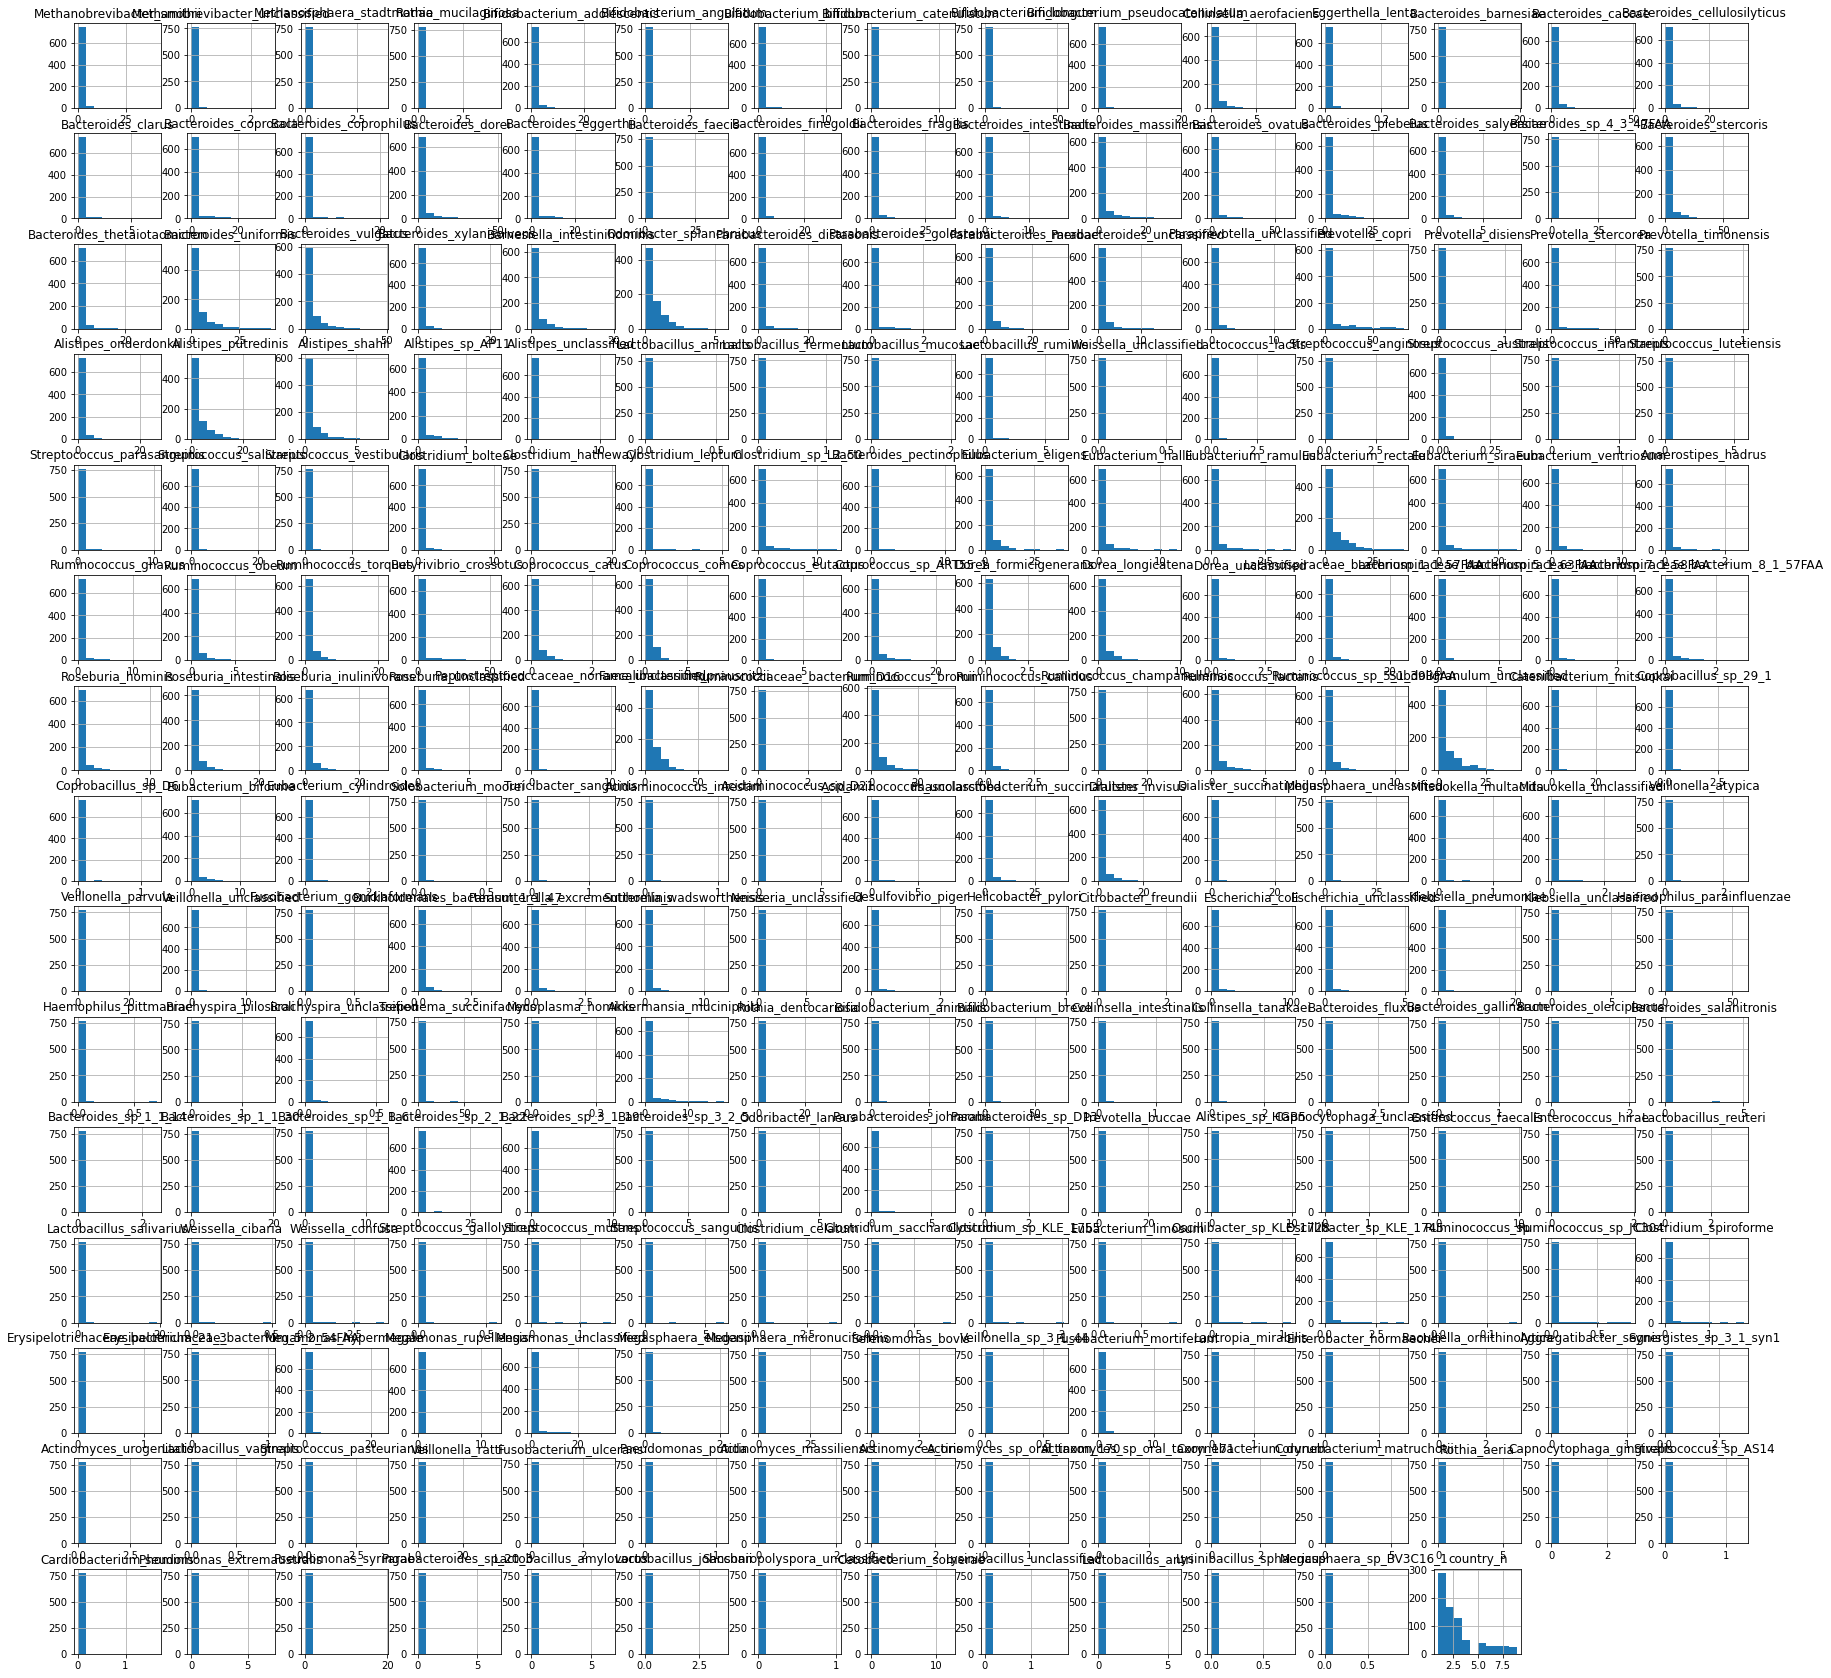

In [255]:
df.hist(figsize=(30,30))

## Check correlations


In [256]:
df_features= df.drop('country', axis=1)

## Defining X and y


In [555]:
## set X and y

X = df.drop(['country','country_n'], axis=1)
y = df['country_n']

## Train Test split

In [556]:
## Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=124, stratify=y) # stratify means that it evenly take from each target group (y)

## Scaling


In [557]:
## Scaler : another tool to improve our models
#https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) # fitting just on train

X_train = scaler.transform(X_train) # apply transformation on train
X_test = scaler.transform(X_test) # apply transformation on test

## KNN clustering


In [558]:
errors = []

# running model for differet Ks
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k) # we do not know what K is going to be best
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_train)
    errors.append(np.mean(pred_y != y_train)) # very crude avg error rate for that K

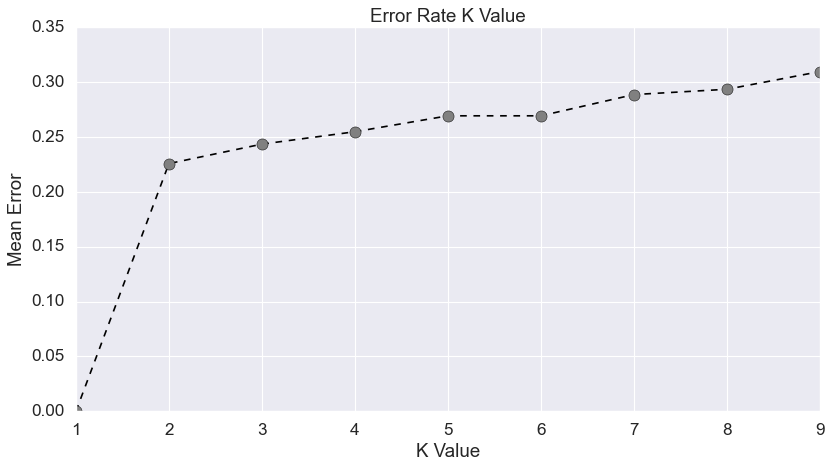

In [559]:
## We want to find the K with the smallest error that is not one

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10)
         , errors
         , color='black'
         , linestyle='dashed'
         , marker='o'
         , markerfacecolor='grey'
         , markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

### Run the model


In [560]:
## 3 is the best K so we run the model with 3
## three is the K with the lowest error rate after 1

classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### Predict and product the classification report


In [561]:
## predict on test

y_pred = classifier.predict(X_test)

In [562]:
## classification report

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[51  3  2  1  0  0  0  0  0]
 [ 7 21  3  1  0  0  1  0  0]
 [13  6  6  0  0  0  1  0  0]
 [ 1  2  1  5  1  0  0  0  0]
 [ 1  3  0  2  2  0  0  0  0]
 [ 3  0  0  0  1  1  1  0  0]
 [ 0  3  1  0  0  0  1  0  0]
 [ 3  0  0  1  0  0  0  0  1]
 [ 1  1  0  1  1  1  0  0  0]]
              precision    recall  f1-score   support

           1       0.64      0.89      0.74        57
           2       0.54      0.64      0.58        33
           3       0.46      0.23      0.31        26
           4       0.45      0.50      0.48        10
           5       0.40      0.25      0.31         8
           6       0.50      0.17      0.25         6
           7       0.25      0.20      0.22         5
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.56       155
   macro avg       0.36      0.32      0.32       155
weighted avg       0.50      0.56      0.51       155



/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


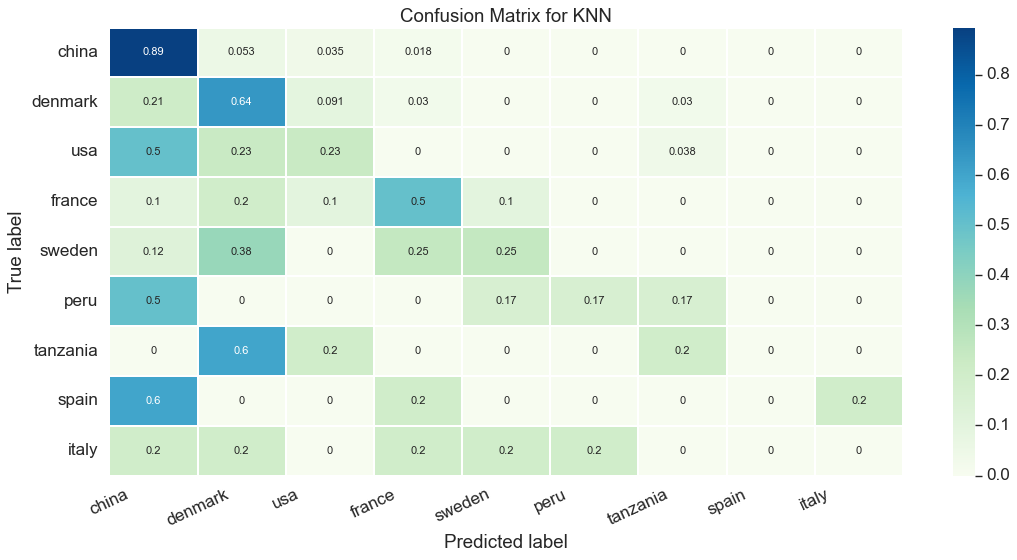

In [563]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.GnBu, linewidths=0.2)

# Add labels to the plot
class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN')
plt.show()

The model can distinguish some countries better than others!!

## DBSCAN

DBSCAN stands for density-based spatial clustering of applications with noise. It's a density-based clustering algorithm, unlike k-means.

This is a good algorithm for finding outliners in a data set. It finds arbitrarily shaped clusters based on the density of data points in different regions. It separates regions by areas of low-density so that it can detect outliers between the high-density clusters.

This algorithm is better than k-means when it comes to working with oddly shaped data.

DBSCAN uses two parameters to determine how clusters are defined: minPts (the minimum number of data points that need to be clustered together for an area to be considered high-density) and eps (the distance used to determine if a data point is in the same area as other data points).

Choosing the right initial parameters is critical for this algorithm to work.

#### I can fit it on the whole dataset and see if predicted clusters, match the real ones!

In [124]:
# define the model
db = DBSCAN(eps=1, min_samples=9).fit(X)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 1


### Best parameters for DBSCAN

https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

Minimum Samples (“MinPts”)


There is no automatic way to determine the MinPts value for DBSCAN. Ultimately, the MinPts value should be set using domain knowledge and familiarity with the data set. From some research I’ve done, here are a few rules of thumb for selecting the MinPts value:
The larger the data set, the larger the value of MinPts should be
If the data set is noisier, choose a larger value of MinPts
Generally, MinPts should be greater than or equal to the dimensionality of the data set
For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

In [150]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=9)
neighbors_fit = neighbors.fit(X_train)
distances, indices = neighbors_fit.kneighbors(X_train)

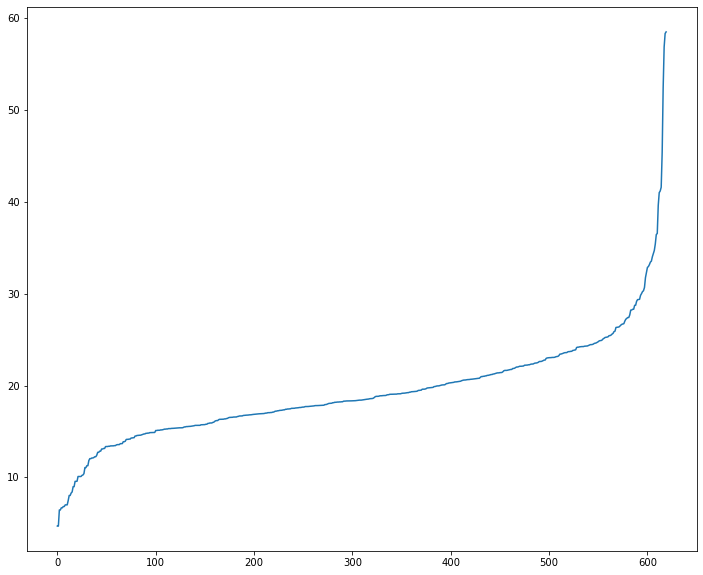

In [151]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(12,10))
plt.plot(distances)

The ideal value for ε will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature. This point represents the optimization point where diminishing returns are no longer worth the additional cost. This concept of diminishing returns applies here because while increasing the number of clusters will always improve the fit of the model, it also increases the risk that overfitting will occur.


Zooming in on my k-distance plot, it looks like the optimal value for ε is around 25. I ended up looping through combinations of MinPts and ε values slightly above and below the values estimated here to find the model of best fit.

In [ ]:
# define the model

eps=list(range(20,30))
min_samples=list(range(5,15))

for x in eps:
    for j in min_samples:
        db = DBSCAN(eps=x, min_samples=j).fit(X_train)
        labels = db.labels_
        no_clusters = len(np.unique(labels) )
        no_noise = np.sum(np.array(labels) == -1, axis=0)

        print('Estimated no. of clusters: %d' % no_clusters)
        print('Estimated no. of noise points: %d' % no_noise)

In [170]:
db = DBSCAN(eps=20, min_samples=5).fit(X_train)
labels = db.labels_+2
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 4
Estimated no. of noise points: 0


In [171]:
labels

array([2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 3, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 3, 2, 4, 1, 2, 2, 2, 4, 2,
       1, 1, 3, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 4, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 3, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 3, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 4, 1, 2, 2, 1, 1,
       2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1,

In [178]:
y_train

673    1
505    2
42     3
58     3
517    2
      ..
509    2
774    8
375    1
696    8
671    1
Name: country_n, Length: 620, dtype: int64

### Performance of DBSCAN

In [184]:
metrics.accuracy_score(y_train, X_train['labels'])


0.30806451612903224

Quite low accuracy!!

## DIMENSIONALITY REDUCTION

I tried different techniques to reduce the number of the features:
1. removing highly correlated features
1. PCA keeping the columns that explain 95% of the variation
1. Lasso
1. ANOVA to select the best features

### 1. Dropping features with collinearity

In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # a module to evaluate the variance inflation factor (VIF)


In [206]:
## This a piece of code from stats.stackexchange.com

## It runs the model with all of the variables. 
## If any of them have a higher VIF than 5, it drops the max. 
## Then it keeps going until none of them have a higher VIF than 5.
## This leaves us with a nice set of features with no collineraity

def calculate_vif(X, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(np.max(vif))   # getting the index of the highest VIF value
        if np.max(vif) > thresh:
            print('dropping ' + X.iloc[:, variables].columns[maxloc] +
                  ' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    #print('Remaining variables:')
    #print(X.columns[variables]) # finally, we print the variables that are still in our set
    return X.iloc[:, variables] # and return our X cut down to the remaining variables

In [287]:
# drop features that have collinearity
X_VIF=calculate_vif(X)

/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping Actinomyces_sp_oral_taxon_170 at index: 203
dropping Actinomyces_sp_oral_taxon_171 at index: 203
dropping Capnocytophaga_gingivalis at index: 206
dropping Pseudomonas_extremaustralis at index: 208
dropping Lysinibacillus_unclassified at index: 214
dropping Cardiobacterium_hominis at index: 207
dropping Rothia_aeria at index: 205
dropping Rothia_dentocariosa at index: 141
dropping Corynebacterium_matruchotii at index: 203
dropping Actinomyces_massiliensis at index: 200
dropping Streptococcus_sp_AS14 at index: 202
dropping Corynebacterium_durum at index: 201
dropping Capnocytophaga_unclassified at index: 160
dropping Megasphaera_micronuciformis at index: 184
dropping Lactobacillus_reuteri at index: 162
dropping Neisseria_unclassified at index: 126
dropping Actinomyces_oris at index: 196
dropping Lactobacillus_johnsonii at index: 199
dropping Streptococcus_sanguinis at index: 166
dropping Actinomyces_urogenitalis at index: 189
dropping Lactobacillus_salivarius at index: 161
dropp

In [288]:
X_VIF.shape

(775, 186)

In [289]:
## Train test split

X_train_VIF, X_test_VIF, y_train_VIF, y_test_VIF = train_test_split(X_VIF, y, test_size=0.20, random_state=124, stratify=y) # stratify means that it evenly take from each target group (y)

### 2. PCA

In [405]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

# Fit on training set only.
scaler.fit(X)

# Apply transform to both the training set and the test set.
X_pca = scaler.transform(X)
#X_test = scaler.transform(X_test)

In [406]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_pca)

PCA(n_components=0.95)

In [407]:
X_pca = pca.transform(X_pca)
#test_pca = pca.transform(X_test)

In [216]:
#train_pca.shape

(581, 130)

### 3. Lasso


Best alpha using built-in LassoCV: 0.382353
Best score using built-in LassoCV: 0.329985
Lasso picked 29 variables and eliminated the other 194 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

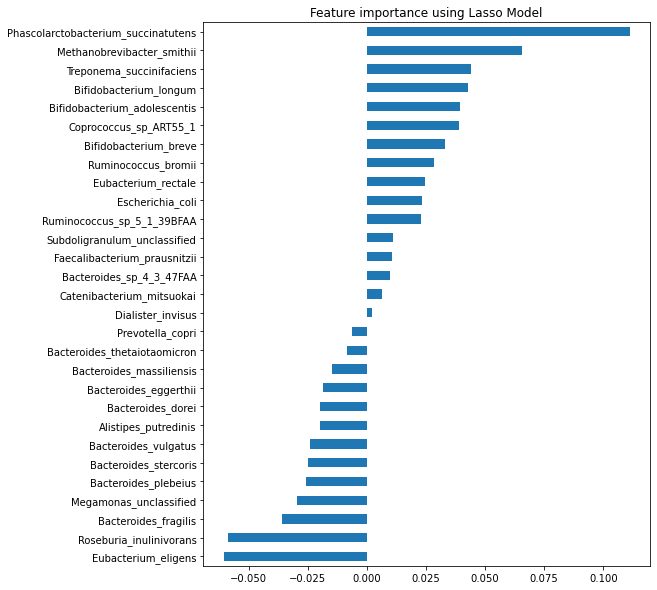

In [236]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef[coef!=0].sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### 4. ANOVA

In [191]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [202]:
anova_filter = SelectKBest(f_classif, k=50)
clf = LinearSVC()
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('selectkbest', SelectKBest(k=50)), ('linearsvc', LinearSVC())])

#### Model does not converge :(

In [204]:
anova_svm[:-1].inverse_transform(anova_svm[-1].coef_)

array([[-0.12285729,  0.14691591,  0.        , ...,  0.        ,
         0.        ,  0.35111973],
       [-0.25302627,  0.22646508,  0.        , ...,  0.        ,
         0.        ,  0.19512827],
       [ 0.0308652 , -0.62607755,  0.        , ...,  0.        ,
         0.        , -0.11310845],
       ...,
       [-0.37679681, -0.08016146,  0.        , ...,  0.        ,
         0.        ,  0.05642486],
       [-0.02012303,  0.81902246,  0.        , ...,  0.        ,
         0.        ,  0.68604286],
       [-0.00602328,  0.61611112,  0.        , ...,  0.        ,
         0.        , -0.19026366]])

## KNN (PCA) --> Performs best out of the three KNNs


KNN is non-parametric model and so there is no question of multi-collinearity because the algorithm does not examine Features separately.

What matters in KNN is the distance function that defines distance between any 2 points. The choice of the distance function can affect your result.

KNN is the ultimate non-parametric model and I doubt if any other advanced models can beat it in terms of accuracy performance.

The only disadvantage of KNN is that it has huge latency as every point needs to be compared while making a prediction. You can also look at Kernel regression and Locally linear regression which are close cousins to KNN.

In [564]:
## Train test split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.20, random_state=124, stratify=y) # stratify means that it evenly take from each target group (y)

In [565]:
errors = []

# running model for differet Ks
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k) # we do not know what K is going to be best
    knn.fit(X_train_pca, y_train_pca)
    pred_y = knn.predict(X_train_pca)
    errors.append(np.mean(pred_y != y_train_pca)) # very crude avg error rate for that K

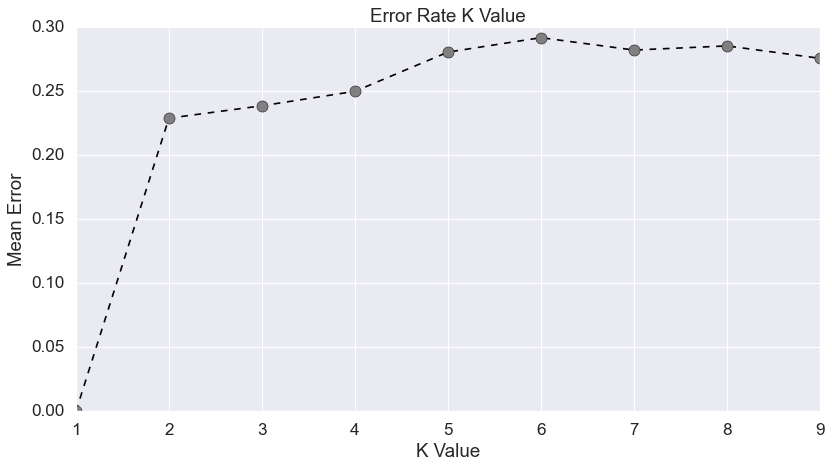

In [566]:
## We want to find the K with the smallest error that is not one

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10)
         , errors
         , color='black'
         , linestyle='dashed'
         , marker='o'
         , markerfacecolor='grey'
         , markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [567]:
## 2 is the best K so we run the model with 2
## 2 is the K with the lowest error rate after 1

classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train_pca, y_train_pca)

KNeighborsClassifier(n_neighbors=2)

In [568]:
## predict on test

y_pred = classifier.predict(X_test_pca)

In [569]:
y_pred

array([6, 1, 3, 2, 1, 1, 1, 5, 2, 1, 4, 1, 5, 2, 2, 3, 3, 1, 5, 1, 1, 1,
       2, 1, 6, 7, 1, 2, 3, 1, 3, 1, 2, 1, 2, 1, 1, 1, 4, 1, 1, 1, 2, 1,
       1, 2, 1, 2, 2, 7, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 3,
       1, 2, 2, 1, 2, 6, 1, 2, 2, 1, 5, 2, 4, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 7, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1,
       2, 2, 1, 1, 2, 1, 7, 1, 4, 4, 5, 7, 2, 1, 2, 1, 2, 1, 1, 3, 2, 1,
       3])

### Model performance 

In [570]:
## classification report

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_pca, y_pred))
print(classification_report(y_test_pca, y_pred))

[[51  5  1  0  0  0  0  0  0]
 [ 6 23  2  1  0  0  1  0  0]
 [11  8  6  0  0  0  1  0  0]
 [ 1  3  0  3  3  0  0  0  0]
 [ 1  3  0  2  2  0  0  0  0]
 [ 3  0  0  0  0  2  1  0  0]
 [ 0  3  0  0  0  0  2  0  0]
 [ 3  1  0  0  0  1  0  0  0]
 [ 3  2  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.65      0.89      0.75        57
           2       0.48      0.70      0.57        33
           3       0.67      0.23      0.34        26
           4       0.50      0.30      0.37        10
           5       0.40      0.25      0.31         8
           6       0.67      0.33      0.44         6
           7       0.40      0.40      0.40         5
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.57       155
   macro avg       0.42      0.35      0.35       155
weighted avg       0.54      0.57      0.52       155



/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


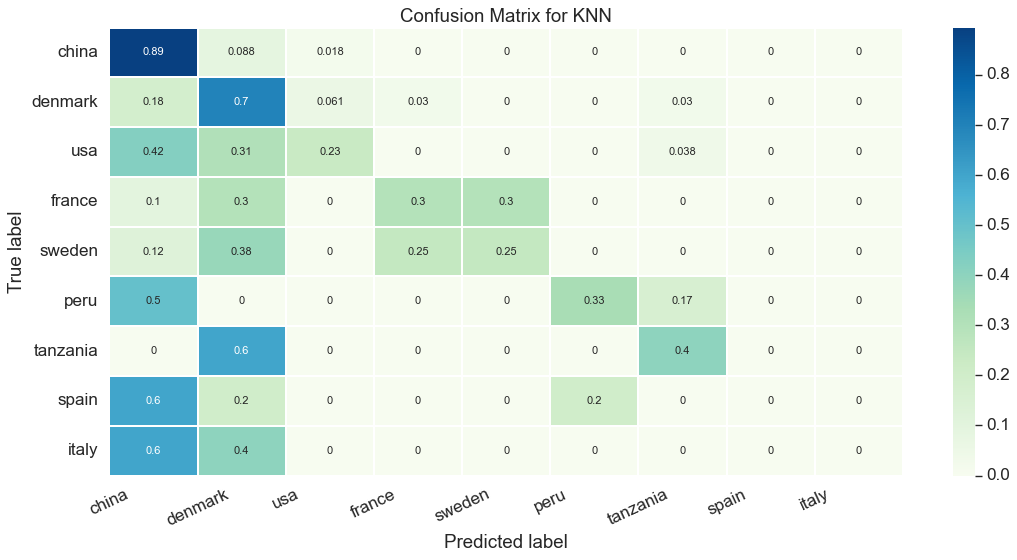

In [571]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_pca, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.GnBu, linewidths=0.2)

# Add labels to the plot
class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN')
plt.show()

1. KNN has a higher precision on Tanzania, China, Denmark and the USA
2. Other european countries cluster less

In [500]:
## predict on whole data set

y_pred_pca = classifier.predict(X_pca)

### Visualising clusters based on the 2 most important PCs

In [501]:
scalar = StandardScaler()

# Fit on training set only.
scaler.fit(X)

# Apply transform to both the training set and the test set.
X_trans = scaler.transform(X)

In [502]:
# Make an instance of the Model
pca = PCA(2)
# fit PCA on scaled data
pca.fit(X_trans)

PCA(n_components=2)

In [503]:
pca_viz = pca.transform(X_trans)

In [504]:
pca_viz= pd.DataFrame(pca_viz, columns=['PC1','PC2'])

In [505]:
pca_viz['country_n']= y

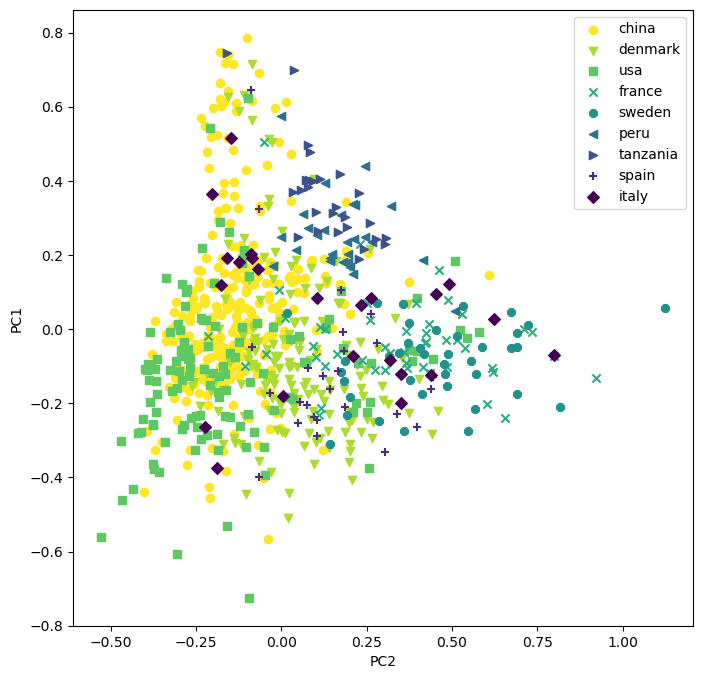

In [586]:
plt.style.use(['default'])
plt.figure(figsize=(8,8))

markersss= ['o','v','s','x','8','<','>','+','D']
colors=['#fde725','#addc30','#5ec962','#28ae80','#21918c','#2c728e','#3b528b','#472d7b','#440154']
class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']

for i in range(9): #for each of the 7 features 
    mi = markersss[i] #marker for ith feature 
    xi = pca_viz[pca_viz['country_n']==i+1][['PC1']] #x array for ith feature .. here is where you would generalize      different x for every feature
    yi = pca_viz[pca_viz['country_n']==i+1][['PC2']] #y array for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(xi,yi,marker=mi, color=ci,s=35, label=class_names[i]) 


#scatter=plt.scatter(pca_viz.PC1, pca_viz.PC2, c=pca_viz.country_n, cmap='viridis', s=55)

plt.ylabel('PC1')
plt.xlabel('PC2')

#class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']

plt.legend()

plt.show()



### Add predictions to dataframe

In [507]:
pca_viz['pred']=y_pred_pca

In [508]:
pca_viz['pred'].unique()

array([3, 2, 1, 7, 4, 5, 6, 8, 9])

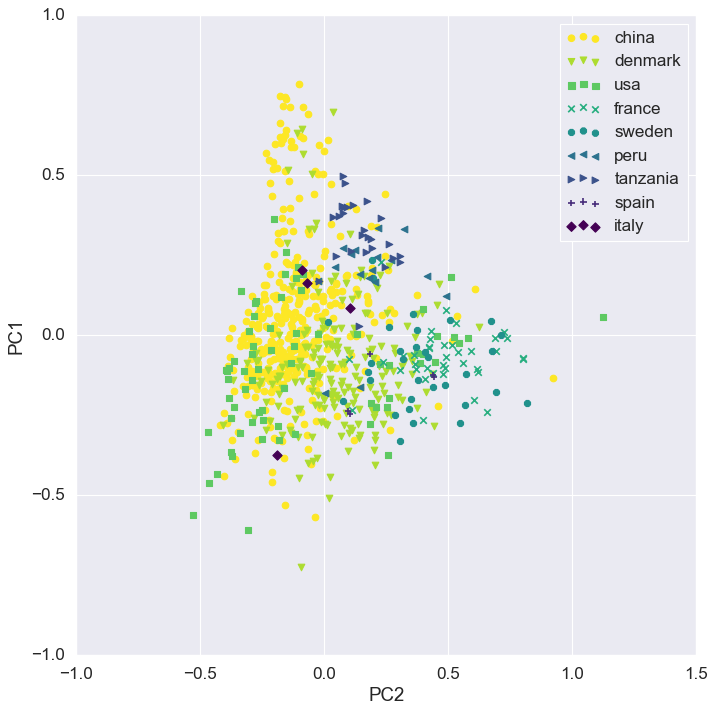

In [509]:
plt.style.use(['seaborn-pastel'])
plt.figure(figsize=(10,10))

markersss= ['o','v','s','x','8','<','>','+','D']
colors=['#fde725','#addc30','#5ec962','#28ae80','#21918c','#2c728e','#3b528b','#472d7b','#440154']
class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']

for i in range(9): #for each of the 7 features 
    mi = markersss[i] #marker for ith feature 
    xi = pca_viz[pca_viz['pred']==i+1][['PC1']] #x array for ith feature .. here is where you would generalize      different x for every feature
    yi = pca_viz[pca_viz['pred']==i+1][['PC2']] #y array for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(xi,yi,marker=mi, color=ci,s=35, label=class_names[i]) 


#scatter=plt.scatter(pca_viz.PC1, pca_viz.PC2, c=pca_viz.country_n, cmap='viridis', s=55)

plt.ylabel('PC1')
plt.xlabel('PC2')

#class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']

plt.legend()

plt.show()

### Confusion matrix of predictions

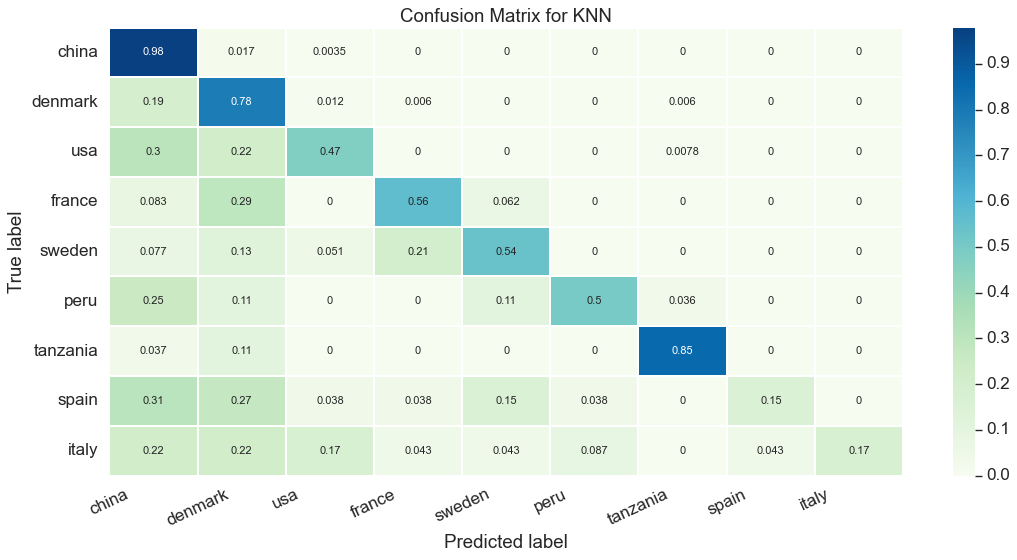

In [510]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(pca_viz['country_n'], pca_viz['pred'])
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.GnBu, linewidths=0.2)

# Add labels to the plot
class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN')
plt.show()

## KNN (no collinearity)

X_train_VIF, X_test_VIF, y_train_VIF, y_test_VIF

In [543]:
errors = []

# running model for differet Ks
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k) # we do not know what K is going to be best
    knn.fit(X_train_VIF, y_train_VIF)
    pred_y = knn.predict(X_train_VIF)
    errors.append(np.mean(pred_y != y_train_VIF)) # very crude avg error rate for that K

/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  

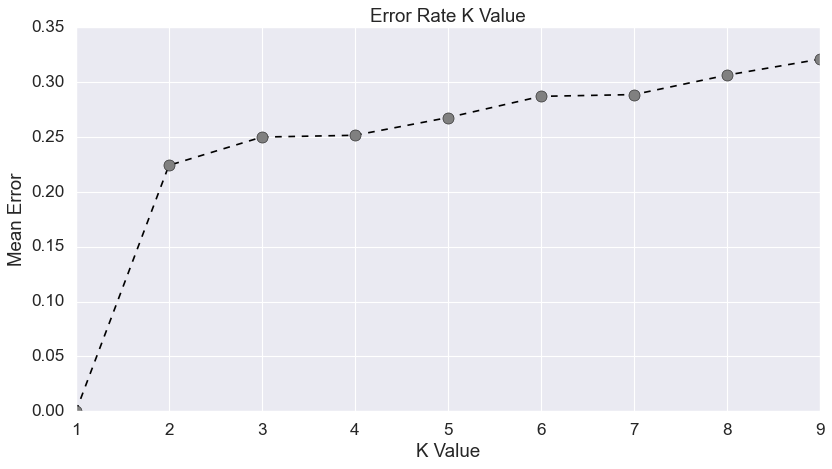

In [544]:
## We want to find the K with the smallest error that is not one

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10)
         , errors
         , color='black'
         , linestyle='dashed'
         , marker='o'
         , markerfacecolor='grey'
         , markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [545]:
## 2 is the best K so we run the model with 2
## 2 is the K with the lowest error rate after 1

classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train_VIF, y_train_VIF)

KNeighborsClassifier(n_neighbors=2)

In [547]:
## predict on test

y_pred = classifier.predict(X_test_VIF)

/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Model performance

In [548]:
## classification report

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_VIF, y_pred))
print(classification_report(y_test_VIF, y_pred))

[[48  1  6  1  0  0  0  1  0]
 [ 6 21  2  3  1  0  0  0  0]
 [13  7  6  0  0  0  0  0  0]
 [ 0  5  2  2  0  0  0  1  0]
 [ 0  3  3  1  1  0  0  0  0]
 [ 3  0  0  0  0  1  2  0  0]
 [ 0  2  0  0  0  2  1  0  0]
 [ 2  2  0  1  0  0  0  0  0]
 [ 2  0  1  2  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.65      0.84      0.73        57
           2       0.51      0.64      0.57        33
           3       0.30      0.23      0.26        26
           4       0.20      0.20      0.20        10
           5       0.50      0.12      0.20         8
           6       0.33      0.17      0.22         6
           7       0.33      0.20      0.25         5
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.52       155
   macro avg       0.31      0.27      0.27       155
weighted avg       0.46      0.52      0.47       155



/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


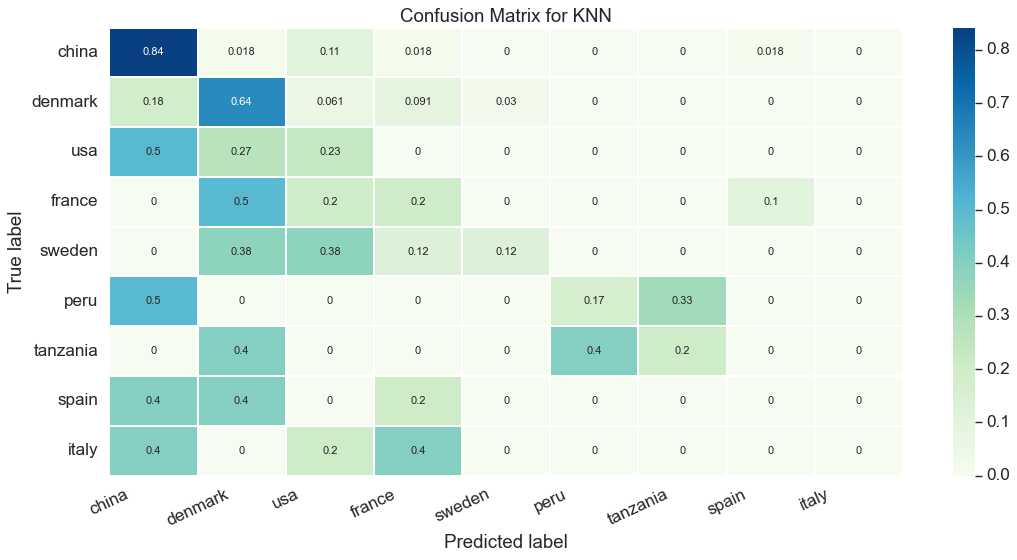

In [549]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_VIF, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.GnBu, linewidths=0.2)

# Add labels to the plot
class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN')
plt.show()

## Random Forest Classifier --> BEST MODEL

In [573]:
# Create Random Forest Classifier
rf = RandomForestClassifier()

# Parameters for Grid Search
rf_params = {
    'n_estimators': [80,100,200, 250, 300, 350, 400, 500, 600, 700],
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
}


gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)

print(gs.best_score_)
gs.best_params_

0.8225806451612904


{'max_depth': 11, 'n_estimators': 600}

Best parameters are max_depth of 11 and n_estimators of 600

In [579]:
forest = RandomForestClassifier(max_depth= 11, n_estimators= 600, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, n_estimators=600, random_state=42)

In [580]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)

### Random forest performance

In [581]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.8129032258064516

In [577]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[56,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  6, 20,  0,  0,  0,  0,  0,  0],
       [ 1,  7,  0,  2,  0,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  5,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  3,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  4,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  2,  0,  0,  0,  1]])

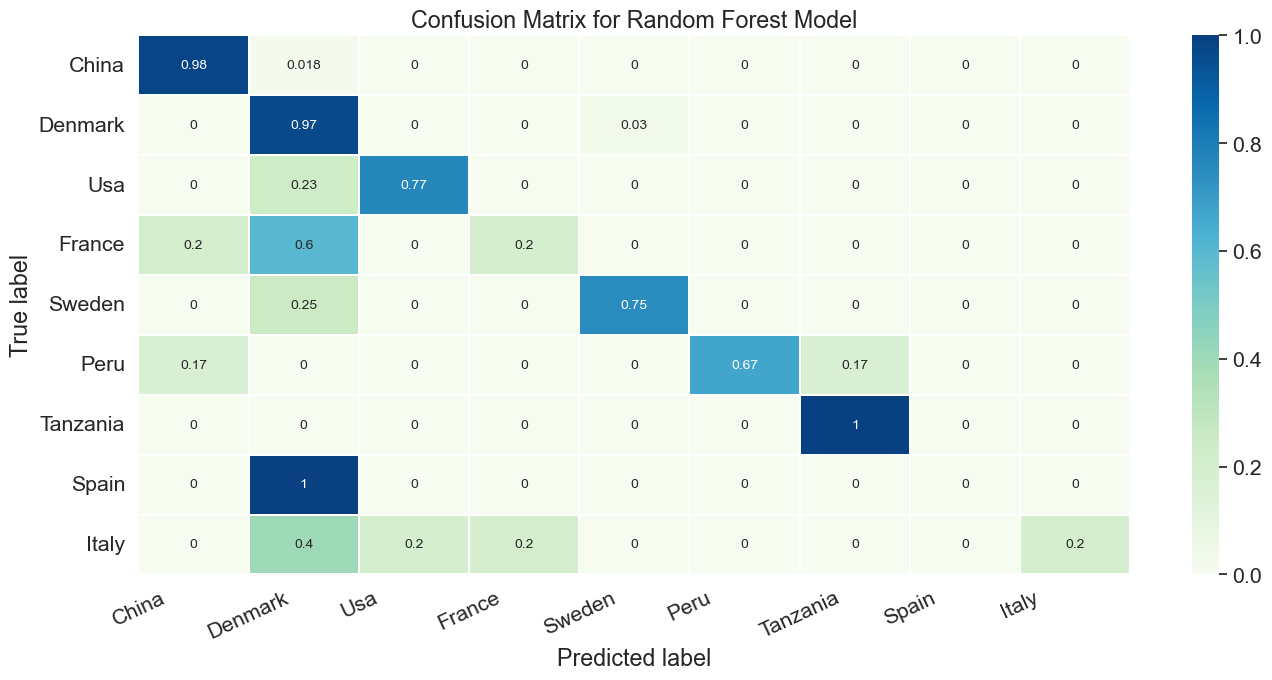

In [588]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.GnBu, linewidths=0.2)

# Add labels to the plot
class_names = ['China', 'Denmark', 'Usa', 'France', 'Sweden', 'Peru', 'Tanzania', 'Spain', 'Italy']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

- Findings: 
1. Random forest was 98% accurate at finding China
1. 97% accurate at identifying Denmark 
1. 81% accurate for USA
1. 67% accurate for Peru, when peru was mislabeled it was either China or Tanzania
1. 100% accurate at labelling Tanzania
1. Italy, Spain often mislabbeled as Denmark--> probably because they are all in Europe

In [582]:
# The most important features are:
importance = list(zip(X.columns, list(rf_model.feature_importances_)))

# Sort features by importance
imp_sorted= sorted(importance, key= lambda x:x[1], reverse=True)
imp_sorted

[('Escherichia_coli', 0.032338631292548964),
 ('Subdoligranulum_unclassified', 0.030606717592711073),
 ('Dorea_longicatena', 0.026820874587973307),
 ('Eubacterium_hallii', 0.026781271018956256),
 ('Ruminococcus_obeum', 0.0264443828831808),
 ('Klebsiella_pneumoniae', 0.025868647296994157),
 ('Bacteroides_stercoris', 0.023065959918686943),
 ('Faecalibacterium_prausnitzii', 0.01815968554807537),
 ('Coprococcus_comes', 0.017898648722839527),
 ('Eubacterium_siraeum', 0.017761588846396923),
 ('Streptococcus_salivarius', 0.016657329366891092),
 ('Coprococcus_catus', 0.016306412050942565),
 ('Prevotella_copri', 0.016130243777864508),
 ('Ruminococcus_gnavus', 0.01432026602073263),
 ('Lachnospiraceae_bacterium_5_1_63FAA', 0.014252706862286002),
 ('Megamonas_unclassified', 0.013971030768684783),
 ('Eubacterium_ramulus', 0.013776380862196147),
 ('Bacteroides_massiliensis', 0.013610213661399211),
 ('Treponema_succinifaciens', 0.013161481105017634),
 ('Bifidobacterium_adolescentis', 0.01316123701745

### Fitting on overall dataset

In [535]:
y_pred_forest = forest.predict(X)

/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [539]:
# View accuracy score 
accuracy_score(y, y_pred_forest)

0.8193548387096774

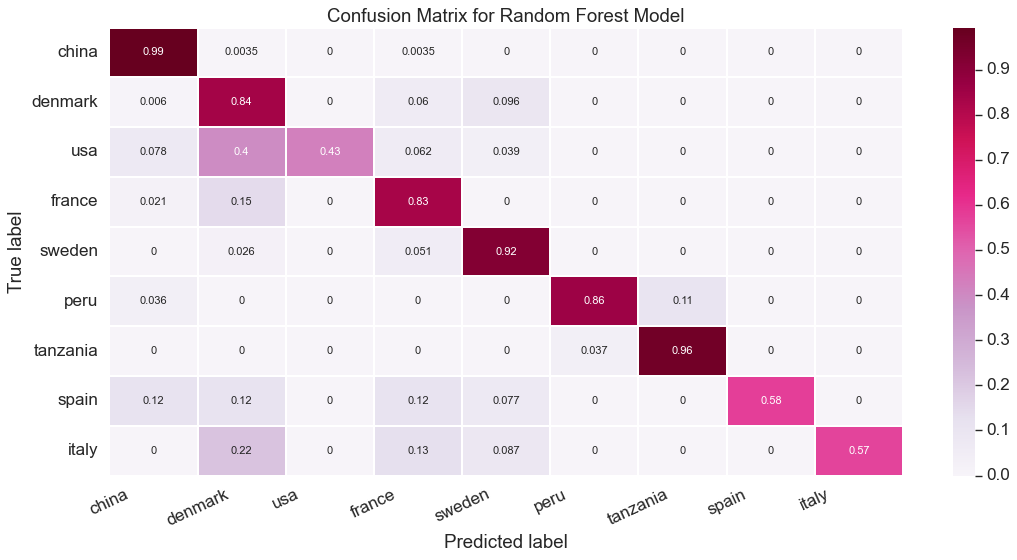

In [540]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y, y_pred_forest)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.PuRd, linewidths=0.2)

# Add labels to the plot
class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## Random Forest (PCA)

In [512]:
# Create Random Forest Classifier
rf = RandomForestClassifier()

# Parameters for Grid Search
rf_params = {
    'n_estimators': [700, 800, 1000, 1010, 1020,1030,1040],
    'max_depth': [ 9, 10,11,12,13,14,15],
}


gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train_pca, y_train_pca)

print(gs.best_score_)
gs.best_params_

0.6290322580645161


{'max_depth': 11, 'n_estimators': 800}

In [513]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier(max_depth= 11, n_estimators= 800, random_state=42)
forest.fit(X_train_pca, y_train_pca)

RandomForestClassifier(max_depth=11, n_estimators=800, random_state=42)

In [514]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test_pca)

In [515]:
# View accuracy score
accuracy_score(y_test_pca, y_pred_test)

0.6064516129032258

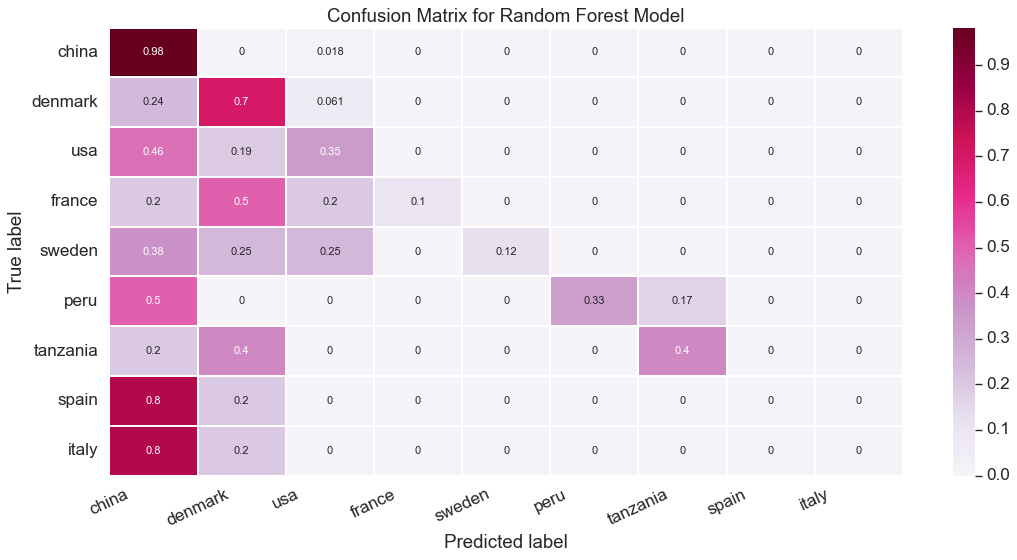

In [516]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_pca, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.PuRd, linewidths=0.2)

# Add labels to the plot
class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [518]:
print('Using PCA features I get a lower accuracy!')

Using PCA features I get a lower accuracy!


## Improvements

- Try XGboost!!